In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
#load in iris set into dataframe
iris = datasets.load_iris()
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)

In [3]:
# scaling length and width for sepal and petal
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
print(scaler.mean_)

[5.84333333 3.05733333 3.758      1.19933333]


In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
# adding target into the df for easier visualization for myself
df.insert(loc = 4, value = iris.target, column = 'target')
df.insert(loc = 5, value = iris.target, column = 'target names')
df['target names'] = df['target names'].replace([0, 1, 2], ['setosa', 'versicolor', 'virginica'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target names
0,-0.900681,1.019004,-1.340227,-1.315444,0,setosa
1,-1.143017,-0.131979,-1.340227,-1.315444,0,setosa
2,-1.385353,0.328414,-1.397064,-1.315444,0,setosa
3,-1.506521,0.098217,-1.283389,-1.315444,0,setosa
4,-1.021849,1.249201,-1.340227,-1.315444,0,setosa
...,...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,2,virginica
146,0.553333,-1.282963,0.705921,0.922303,2,virginica
147,0.795669,-0.131979,0.819596,1.053935,2,virginica
148,0.432165,0.788808,0.933271,1.448832,2,virginica


In [6]:
# create MLP
mlp = MLPClassifier(hidden_layer_sizes = 4, max_iter = 1000, solver = 'lbfgs')

## MLP Petal

In [7]:
# separating length and width then creating x and y for the fit
length = df['petal length (cm)'].to_numpy()
width = df['petal width (cm)'].to_numpy()
x = (np.array([length, width])).T

y = df['target'].to_numpy()

In [8]:
petal_mlp = mlp.fit(x, y)

In [9]:
petal_mlp = np.vstack([petal_mlp.intercepts_[0], petal_mlp.coefs_[0]]).T

In [10]:
petal_mlp

array([[ 9.55929027, -8.43432171, -9.10955713],
       [-5.42413513, -0.39025516, -0.6813635 ],
       [ 1.7652429 ,  0.63196658,  0.48364361],
       [-4.3213398 , -0.14511558, -1.46819804]])

## MLP Sepal

In [11]:
# separating length and width then creating x and y for the fit
length = df['sepal length (cm)'].to_numpy()
width = df['sepal width (cm)'].to_numpy()
x = (np.array([length, width])).T

y = df['target'].to_numpy()

In [12]:
sepal_mlp = mlp.fit(x, y)

In [13]:
sepal_mlp = np.vstack([sepal_mlp.intercepts_[0], sepal_mlp.coefs_[0]]).T

In [14]:
sepal_mlp

array([[ -9.86414034, -13.34147697,   3.56014229],
       [ 16.17890548,   7.36398365,   2.15630235],
       [ -6.29227944,   1.82664875,  11.36436119],
       [  2.14818946, -10.52787545,  11.44233401]])

# B0 + B1x1 + B2x2 

### FOR FIRST ROW
sepal_mlp[0,0] + sepal_mlp[0, 1]x1 + sepal_mlp[0, 2]x2 = 0

Where x1 is a point between [-2, 2]

Now do this 100 times for each row

# Petal

In [15]:
# even spaces between -2 and 2 to plug in
x1 = np.linspace(-2, 2, num = 100)

layer_1 = (-(petal_mlp[0, 1] * x1) - petal_mlp[0, 0] / petal_mlp[0, 2])
layer_2 = (-(petal_mlp[1, 1] * x1) - petal_mlp[1, 0] / petal_mlp[1, 2])
layer_3 = (-(petal_mlp[2, 1] * x1) - petal_mlp[2, 0] / petal_mlp[2, 2])
layer_4 = (-(petal_mlp[3, 1] * x1) - petal_mlp[3, 0] / petal_mlp[3, 2])

Text(0.5, 1.0, 'Petal Width vs Petal Length and Layer Boundaries')

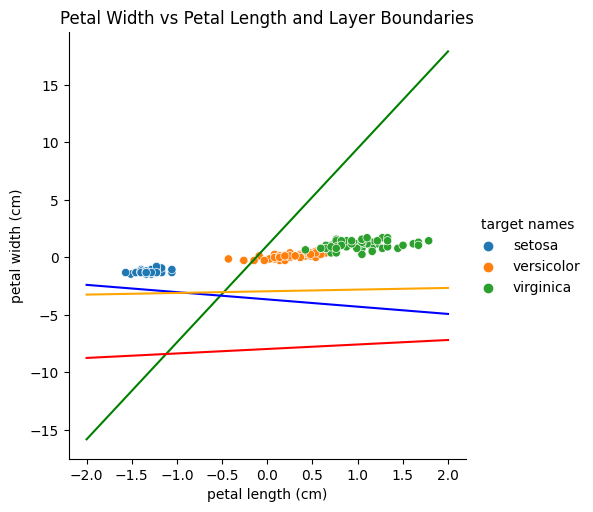

In [16]:
sns.relplot(x = df['petal length (cm)'], y = df['petal width (cm)'], hue = df['target names'])
plt.plot(x1, layer_1, color = 'green')
plt.plot(x1, layer_2, color = 'red')
plt.plot(x1, layer_3, color = 'blue')
plt.plot(x1, layer_4, color = 'orange')
plt.title("Petal Width vs Petal Length and Layer Boundaries")

# Sepal

In [17]:
# even spaces between -2 and 2 to plug in
x1 = np.linspace(-2, 2, num = 100)

layer_1 = (-(sepal_mlp[0, 1] * x1) - sepal_mlp[0, 0] / sepal_mlp[0, 2])
layer_2 = (-(sepal_mlp[1, 1] * x1) - sepal_mlp[1, 0] / sepal_mlp[1, 2])
layer_3 = (-(sepal_mlp[2, 1] * x1) - sepal_mlp[2, 0] / sepal_mlp[2, 2])
layer_4 = (-(sepal_mlp[3, 1] * x1) - sepal_mlp[3, 0] / sepal_mlp[3, 2])

Text(0.5, 1.0, 'Sepal Width vs Sepal Length and Layer Boundaries')

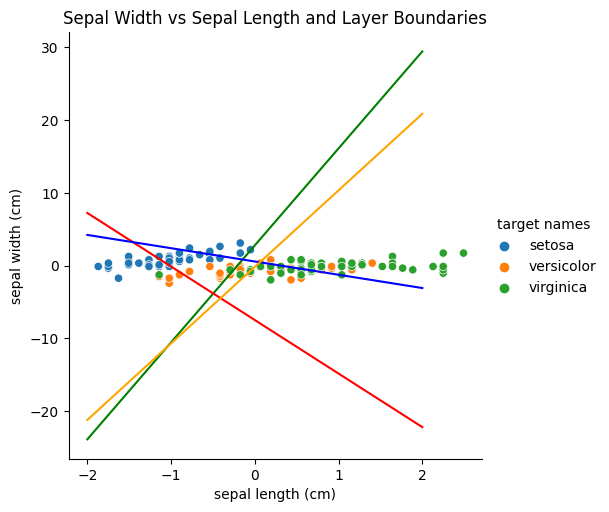

In [18]:
sns.relplot(x = df['sepal length (cm)'], y = df['sepal width (cm)'], hue = df['target names'])
plt.plot(x1, layer_1, color = 'green')
plt.plot(x1, layer_2, color = 'red')
plt.plot(x1, layer_3, color = 'blue')
plt.plot(x1, layer_4, color = 'orange')
plt.title("Sepal Width vs Sepal Length and Layer Boundaries")

# ReLU Activation Function

## Petal 

In [19]:
relu_fun = lambda x: max(0, x)

x = np.linspace(-2, 2, 10)
y = np.linspace(-2, 2, 10)
xv, yv = np.meshgrid(x, y)
#B0 + B1x1 + B2x2 

layer_1 = petal_mlp[0, 0] + (petal_mlp[0, 1] * xv) + (petal_mlp[0, 2] * yv)
layer_2 = petal_mlp[1, 0] + (petal_mlp[1, 1] * xv) + (petal_mlp[1, 2] * yv)
layer_3 = petal_mlp[2, 0] + (petal_mlp[2, 1] * xv) + (petal_mlp[2, 2] * yv)
layer_4 = petal_mlp[3, 0] + (petal_mlp[3, 1] * xv) + (petal_mlp[3, 2] * yv)

for i in range(0, 10):
    layer_1[i] = list(map(relu_fun, layer_1[i]))
    layer_2[i] = list(map(relu_fun, layer_2[i]))
    layer_3[i] = list(map(relu_fun, layer_3[i]))
    layer_4[i] = list(map(relu_fun, layer_4[i]))

In [20]:
# x is no longer the grid but the observations instead
x = df['petal length (cm)'].iloc[:].values
y = df['petal width (cm)'].iloc[:].values
df_petal_1 = pd.DataFrame(list(map(relu_fun, petal_mlp[0, 0] + (petal_mlp[0, 1] * x) + (petal_mlp[0, 2] * y))), columns = ['petal_layer_1'])
df_petal_2 = pd.DataFrame(list(map(relu_fun, petal_mlp[1, 0] + (petal_mlp[1, 1] * x) + (petal_mlp[1, 2] * y))), columns = ['petal_layer_2'])
df_petal_3 = pd.DataFrame(list(map(relu_fun, petal_mlp[2, 0] + (petal_mlp[2, 1] * x) + (petal_mlp[2, 2] * y))), columns = ['petal_layer_3'])
df_petal_4 = pd.DataFrame(list(map(relu_fun, petal_mlp[3, 0] + (petal_mlp[3, 1] * x) + (petal_mlp[3, 2] * y))), columns = ['petal_layer_4'])

petal_matrix = pd.concat([df_petal_1, df_petal_2, df_petal_3, df_petal_4], join = 'outer', axis = 1)

In [21]:
petal_matrix

,petal_layer_1,petal_layer_2,petal_layer_3,petal_layer_4
0,32.846307,0,0.282058,0
1,32.846307,0,0.282058,0
2,33.325692,0,0.246139,0
3,32.366922,0,0.317978,0
4,32.846307,0,0.282058,0
...,...,...,...,...
145,0.000000,0,2.983918,0
146,0.000000,0,2.657427,0
147,0.000000,0,2.792929,0
148,0.000000,0,3.055757,0


<AxesSubplot: >

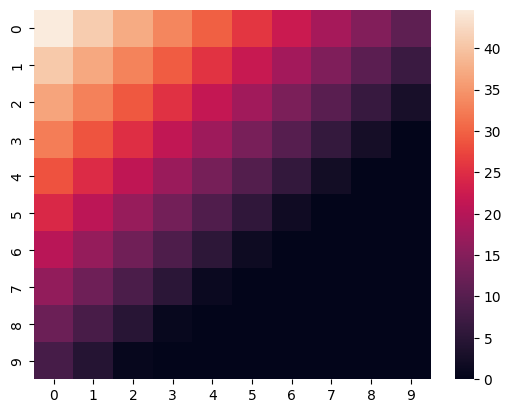

In [22]:
sns.heatmap(layer_1)

<AxesSubplot: >

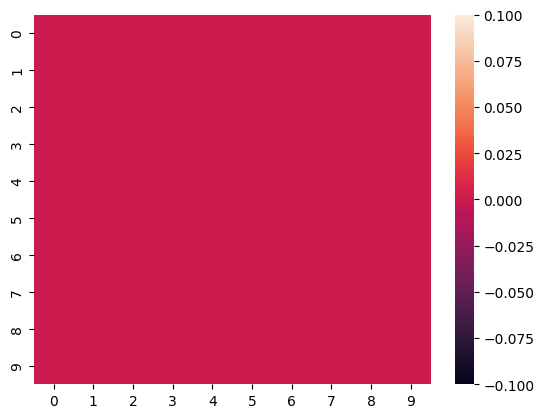

In [23]:
sns.heatmap(layer_2)

<AxesSubplot: >

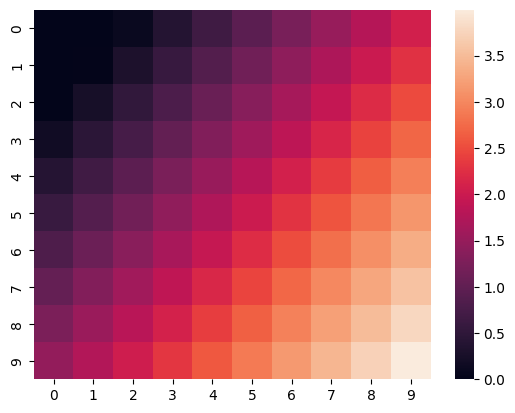

In [24]:
sns.heatmap(layer_3)

<AxesSubplot: >

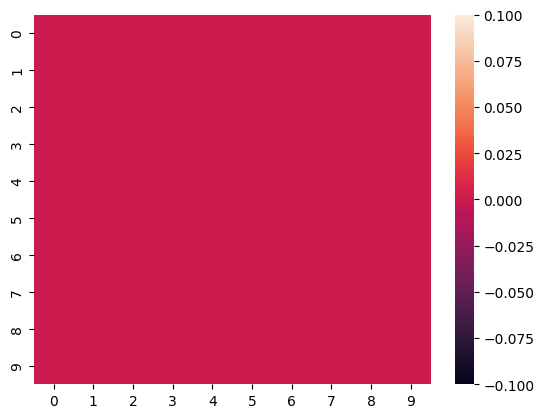

In [25]:
sns.heatmap(layer_4)

## Sepal

In [26]:
relu_fun = lambda x: max(0, x)

x = np.linspace(-2, 2, 10)
y = np.linspace(-2, 2, 10)
xv, yv = np.meshgrid(x, y)
#B0 + B1x1 + B2x2 

layer_1 = sepal_mlp[0, 0] + (sepal_mlp[0, 1] * xv) + (sepal_mlp[0, 2] * yv)
layer_2 = sepal_mlp[1, 0] + (sepal_mlp[1, 1] * xv) + (sepal_mlp[1, 2] * yv)
layer_3 = sepal_mlp[2, 0] + (sepal_mlp[2, 1] * xv) + (sepal_mlp[2, 2] * yv)
layer_4 = sepal_mlp[3, 0] + (sepal_mlp[3, 1] * xv) + (sepal_mlp[3, 2] * yv)

for i in range(0, 10):
    layer_1[i] = list(map(relu_fun, layer_1[i]))
    layer_2[i] = list(map(relu_fun, layer_2[i]))
    layer_3[i] = list(map(relu_fun, layer_3[i]))
    layer_4[i] = list(map(relu_fun, layer_4[i]))

In [27]:
x = df['petal length (cm)'].iloc[:].values
y = df['petal width (cm)'].iloc[:].values

df_sepal_1 = pd.DataFrame(list(map(relu_fun, sepal_mlp[0, 0] + (sepal_mlp[0, 1] * x) + (sepal_mlp[0, 2] * y))), columns = ['sepal_layer_1'])
df_sepal_2 = pd.DataFrame(list(map(relu_fun, sepal_mlp[1, 0] + (sepal_mlp[1, 1] * x) + (sepal_mlp[1, 2] * y))), columns = ['sepal_layer_2'])
df_sepal_3 = pd.DataFrame(list(map(relu_fun, sepal_mlp[2, 0] + (sepal_mlp[2, 1] * x) + (sepal_mlp[2, 2] * y))), columns = ['sepal_layer_3'])
df_sepal_4 = pd.DataFrame(list(map(relu_fun, sepal_mlp[3, 0] + (sepal_mlp[3, 1] * x) + (sepal_mlp[3, 2] * y))), columns = ['sepal_layer_4'])

sepal_matrix = pd.concat([df_sepal_1, df_sepal_2, df_sepal_3, df_sepal_4], join = 'outer', axis = 1)

<AxesSubplot: >

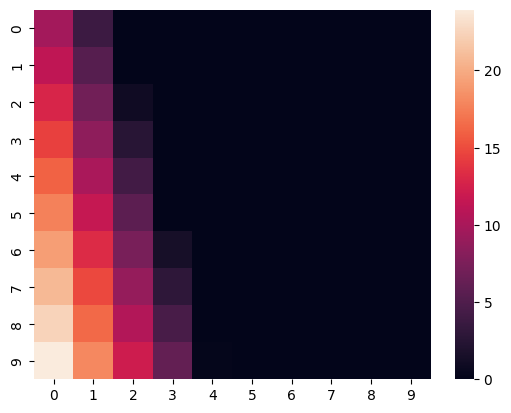

In [28]:
sns.heatmap(layer_1)

<AxesSubplot: >

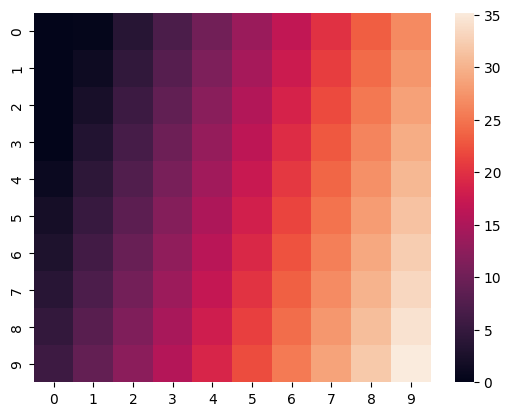

In [29]:
sns.heatmap(layer_2)

<AxesSubplot: >

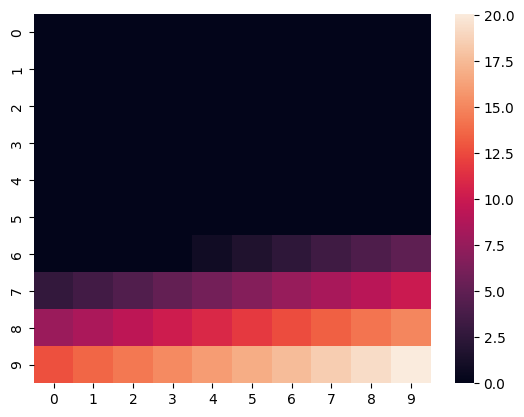

In [30]:
sns.heatmap(layer_3)

<AxesSubplot: >

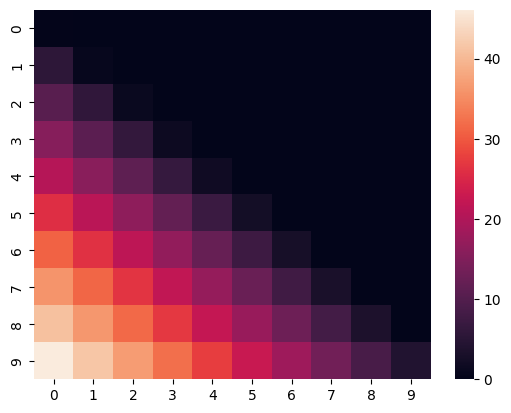

In [31]:
sns.heatmap(layer_4)

# Logistic Regression Model
For each observation on the petal features in the scaled data compute the output of each neuron in the petals MLP model you created above.

- Repeat for the sepal MLP model.
- Combine the 8 resulting neuron outputs into a single transformed feature matrix

In [32]:
sgd = SGDClassifier(loss = 'log_loss')

In [53]:
combined_neurons = pd.concat([petal_matrix, sepal_matrix], join = 'outer', axis = 1)
x = combined_neurons.iloc[:,1:].values
y = df['target'].to_numpy()

for i in range(0, 5): 
    x_train, x_test, y_train, y_test = train_test_split(x, y)

    sgd.fit(x_train, y_train)

    y_test_results = sgd.predict(x_test)

    print("Accuracy Score: " , accuracy_score(y_test, y_test_results))
    print("Confusion Score: \n", confusion_matrix(y_test, y_test_results))
    print("\n")

Accuracy Score:  0.6578947368421053
Confusion Score: 
 [[10  0  1]
 [ 0  1 12]
 [ 0  0 14]]


Accuracy Score:  0.6578947368421053
Confusion Score: 
 [[13  0  0]
 [ 9  0  4]
 [ 0  0 12]]


Accuracy Score:  0.9210526315789473
Confusion Score: 
 [[ 9  1  0]
 [ 0 20  0]
 [ 0  2  6]]


Accuracy Score:  0.5789473684210527
Confusion Score: 
 [[12  0  0]
 [11  0  5]
 [ 0  0 10]]


Accuracy Score:  0.7894736842105263
Confusion Score: 
 [[11  1  0]
 [ 0 11  0]
 [ 0  7  8]]




## LR For Original 4 Features

In [47]:
# separating length and width then creating x and y for the fit
petal_length = df['petal length (cm)'].to_numpy()
petal_width = df['petal width (cm)'].to_numpy()
sepal_length = df['petal length (cm)'].to_numpy()
sepal_width = df['petal width (cm)'].to_numpy()

x = (np.array([petal_length, petal_width, sepal_length, sepal_width])).T
y = df['target'].to_numpy()

for i in range(0, 5): 
    x_train, x_test, y_train, y_test = train_test_split(x, y)

    sgd.fit(x_train, y_train)

    y_test_results = sgd.predict(x_test)

    print("Accuracy Score: " , accuracy_score(y_test, y_test_results))
    print("Confusion Score: \n", confusion_matrix(y_test, y_test_results))
    print("\n")

Accuracy Score:  0.9736842105263158
Confusion Score: 
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 18]]


Accuracy Score:  0.9473684210526315
Confusion Score: 
 [[13  0  0]
 [ 1 13  1]
 [ 0  0 10]]


Accuracy Score:  0.8947368421052632
Confusion Score: 
 [[13  0  0]
 [ 2 13  1]
 [ 0  1  8]]


Accuracy Score:  0.7631578947368421
Confusion Score: 
 [[ 6  7  0]
 [ 0 11  0]
 [ 0  2 12]]


Accuracy Score:  0.9210526315789473
Confusion Score: 
 [[15  0  0]
 [ 0 10  0]
 [ 0  3 10]]


